In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.randn(N) > 0

In [4]:
s = 2 * ip - 1

In [5]:
PS_dB = np.arange(start = 0,stop = 50, step = 5)

In [6]:
optimal_covert_rate = np.zeros(len(PS_dB))

In [7]:
##Fixed Parameters
r_p = 0.1

beta = -3.5

epsilon = 0.45

BW = 20 * 10**6

PS = 10**(23/ 10) / (10**3)

sigma_square_R = 10**(-160/10) / (10**3) * BW

sigma_square_D = 10**(-160/10) / (10**3) * BW

sigma_square_bar_w = 10**(-160/10) / (10**3) * BW

sigma_square_SI = 10**(-160/10) / (10**3) * BW

zeta = 10**(5/10)


PL_DR = (1/10**3) * (np.sqrt(np.square(100)+np.square(100)) / 1)**beta

PL_SR = (1/10**3) * (np.sqrt(np.square(100) + np.square(100))/1)**beta

PL_SD = (1/10**3) * (np.sqrt(np.square(200) + np.square(0))/1)**beta

PL_DW = (1/10**3) * (np.sqrt(np.square(100)+np.square(100)))

PL_DD = sigma_square_SI


In [8]:
covert_capacity = np.zeros(len(PS_dB))


In [9]:
def minimum_PD(h_DR,h_SR,h_SD,h_DW,h_DD,PS):
    
    min_value = []
    
    PR = (1/np.abs(h_DR)**2) * ((np.abs(h_SR)**2 * PS) /(2**r_p-1) - sigma_square_R )
    
    min_value.append(PR)
    
    PD = (1/np.abs(h_DD)**2) * ((np.abs(h_SD)**2 * PS)/(2**r_p - 1)-sigma_square_D)
    
    min_value.append(PD)
    
    dep = (zeta**(1-4 * epsilon) - (1/zeta))* (sigma_square_bar_w / np.abs(h_DW)**2)
    
    
    min_value.append(dep)
    
    PD = min(min_value)
    
    return PD
    
    
    

In [10]:
def covert_rate():
    
    for jj in range(len(PS_dB)):
        
        PS = 10**(PS_dB[jj])/10 / (10**3)
        
        total_capacity = 0

        for ii in range(N):
            
            h_DR = np.sqrt(PL_DR) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_SR = np.sqrt(PL_SR) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_SD = np.sqrt(PL_SD) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_DW = np.sqrt(PL_DW) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_DD_tilde = np.sqrt(PL_DD) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            PD = minimum_PD(h_DR,h_SR,h_SD,h_DW,h_DD_tilde,PS)
            
            c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))
            
            total_capacity = total_capacity + c
            
        optimal_covert_rate[jj] = total_capacity / N
        
    return optimal_covert_rate
        
    

min_value [-0.043111374717472804, -0.7660299683788278, 2.2139250296433537e-12]
min_value [-0.8227327155470328, -0.22426856308897383, 1.2008005724665467e-12]
min_value [-1.9619527454047947, -9.804886384561176, 1.061834821872309e-11]
min_value [-0.4172414360888207, -1.0160942137661586, 8.287086147236084e-12]
min_value [-0.10978108634811118, -12.479433899764654, 5.93385955961541e-13]
min_value [-0.05724994612202158, -1.7526714641357497, 2.7013817394450897e-11]
min_value [-0.06669625472137225, -2.358380850831649, 1.5349510486187624e-11]
min_value [-0.5070867280611429, -0.6807891881418601, 1.2582313892960884e-10]
min_value [-0.0826808996811898, -0.5476679164546303, 2.52404623801946e-12]
min_value [-0.2638396222805853, -14.205687509484353, 6.841933112839871e-13]
min_value [-0.05954831000095936, -2.8058261307754275, 4.070902549634967e-12]
min_value [-0.5051232099040041, -3.1146972286811647, 4.796098317259672e-12]
min_value [-0.03158660373261289, -2.275893235902326, 2.21560462847678e-12]
min_v

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23484\2527531760.py:23: RuntimeWarning: invalid value encountered in log2
  c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))



min_value [462.8251771922101, 27.440234749808834, 1.6886092312391535e-12]
min_value [61.63674376709398, 15778.792047498107, 6.379193256564045e-13]
min_value [106.00189562941429, 904.3906600555458, 2.1272821013662974e-12]
min_value [345.1713184377539, 321.1886857094079, 7.200575170319896e-11]
min_value [8.635883011230762, 36.48378161461959, 1.012139552541109e-12]
min_value [75.72821358439506, 357.68197161472375, 4.935475883676191e-13]
min_value [30.50371752169314, 287.9872752325137, 1.3719522709175655e-12]
min_value [20.070407825825818, 579.2952022176108, 4.811816687810074e-12]
min_value [11.79224312433802, 115.41752085403199, 1.2060699798215208e-12]
min_value [3.120180878380489, 18.814295411583522, 6.715501050259149e-13]
min_value [442.1542333168488, 1579.0425063730238, 6.825551295414441e-12]
min_value [179.2492814661672, 4122.264815824136, 3.556284797134041e-12]
min_value [1025.2020585563214, 127.38280556800117, 3.304935384828317e-12]
min_value [159.40444769286222, 0.5518308903847876

min_value [-16841813.404030908, -1519920.1038315364, 5.310619066708738e-13]
min_value [-1041575.7765036911, -29466818.991424963, 3.671449733022686e-12]
min_value [-3555239.339738215, -5140168.723455351, 1.2059609796090074e-12]
min_value [-9256849.696917836, -124305376.96216263, 4.6615934016064135e-12]
min_value [-4864717.300840644, -2326490.058211281, 5.8938416366889785e-12]
min_value [-4305644.283361778, -17716083.24566611, 6.89962836291212e-13]
min_value [-2036056.153244339, -69261.5267661681, 2.0429991243180384e-11]
min_value [-2436204.405044886, -13001730.619522134, 7.22868453806129e-13]
min_value [-207630.26450825372, -3508241.4002471226, 5.056336825479479e-13]
min_value [-4390599.765189379, -4711237.972387008, 8.227050654021741e-12]
min_value [-639051.523838615, -16291821.165114123, 3.2080853342967952e-12]
min_value [-1523966.8253766436, -6699533.712745562, 5.183568200529986e-12]
min_value [-40303000.779351324, -39063675.03500454, 5.643650700493316e-13]
min_value [-2926338.351653

min_value [279719.9776737436, 191646469.12372604, 9.016709612617552e-13]
min_value [1332557.6789394508, 11809497.51238131, 1.7901211705013053e-11]
min_value [4532550.46910578, 16712449.773568107, 1.9381210489061546e-12]
min_value [626442.3700381812, 8282263.6418920895, 8.583550709278575e-13]
min_value [13921489.793451572, 52737641.2040189, 7.895735532776654e-12]
min_value [2265968.790019669, 44573522.70057838, 9.22259275430854e-13]
min_value [917502.5646920921, 1957792.5269904556, 1.7393405569843868e-12]
min_value [17065.43725177455, 72479163.84204015, 1.9101588160437373e-13]
min_value [3864997.2763086534, 9785539.093058275, 4.797514217399179e-13]
min_value [137016.56095948681, 20894078.73304685, 3.9779624386907794e-13]
min_value [5052017.164334683, 241129621.63785088, 2.0977081507125217e-12]
min_value [7461393.374517597, 6464369.338097994, 5.219034012104503e-13]
min_value [856918.5751890402, 19278874.38206971, 7.687284055952625e-13]
min_value [864684.8765349751, 13290429.819467146, 4.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23484\2527531760.py:23: RuntimeWarning: divide by zero encountered in log2
  c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))


 [-0.973880785542641, -0.5287275548544156, 5.215171295390079e-12]
min_value [-0.17878269474005504, -0.78507011830796, 1.2339317353481445e-12]
min_value [-0.0787175509974951, -4.391046349767112, 7.568167604201105e-13]
min_value [-0.0703816557794884, -1.5575783537311267, 4.8071492190858676e-12]
min_value [-0.075859879730289, -1.0010869619554168, 4.705950250760462e-13]
min_value [-1.6955449126948179, -2.282290814133078, 7.385979593366141e-12]
min_value [-1.872610297250739, -2.016970421147953, 6.920803965150763e-13]
min_value [-0.06875141597666523, -0.9329889459236459, 5.564071639966196e-11]
min_value [-0.015680887531114795, -4.627599876646743, 3.2792305973924445e-13]
min_value [-0.07886259734808951, -6.726688006642514, 4.876551079942622e-12]
min_value [-0.13846920902692816, -0.47258441886763514, 1.3242427182433442e-12]
min_value [-18.895304875208954, -0.9550628758067222, 5.339638411381087e-13]
min_value [-0.12137451025528354, -2.718330385957111, 1.1623400502439392e-12]
min_value [-0.03140

min_value [-0.29706170940906657, -0.7480799317809382, 1.224949860502637e-12]
min_value [-0.09625672254330342, -8.278577838309793, 2.261960385156043e-12]
min_value [-0.03442160126918275, -6.787861277987207, 2.8033523369638318e-12]
min_value [-0.10721513209010763, -0.7481713883747412, 6.955245308582462e-13]
min_value [-0.30020044930624035, -2.1420667994611593, 3.807996182282216e-12]
min_value [-0.14255112495996225, -2.65733083018968, 9.823885267878594e-13]
min_value [-0.19613037673694736, -16.79167970736523, 3.084998682031378e-12]
min_value [-0.11902426787421473, -0.3376479581404287, 4.411900918460689e-12]
min_value [-0.19122787021131518, -4.218797059230573, 2.412160887376461e-11]
min_value [-0.17361940606398035, -3.2264141306621634, 3.6459579807958063e-13]
min_value [-4.068138472983445, -0.6437634389236279, 1.18099197308148e-11]
min_value [-0.21492406059863614, -0.3070351636729591, 2.654787436397737e-12]
min_value [-0.04800249927756713, -296.1414819941415, 8.809131985152248e-12]
min_val

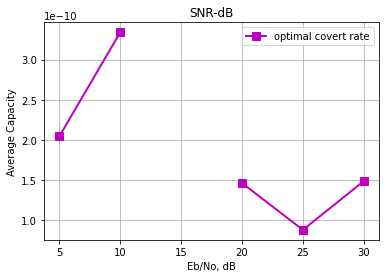

In [11]:
optimal_rate = covert_rate()

plt.figure()

plt.plot(PS_dB, optimal_rate, 'ms-', linewidth=2, markersize=8, label='optimal covert rate')

plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()